In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load node2vec+ results
result_df = pd.read_csv('../result/gene_classification_n2vplus.csv')
optim_idx_ary = result_df.groupby(['Network', 'Method', 'Task', 'gamma'])['Validation score'].agg('idxmax').values
result_df = result_df.iloc[optim_idx_ary]
result_df

,Training score,Validation score,Testing score,Task,Dataset,Network,Method,p,q,gamma
1332,1.082586,2.518322,1.234658,DOID:0050534,DisGeNet,HumanBase-global,Node2vec+,0.01,10.00,0.0
4588,4.658025,2.537467,2.992838,DOID:0050534,DisGeNet,HumanBase-global,Node2vec+,100.00,0.01,1.0
4736,4.987376,3.079300,2.606408,DOID:0050534,DisGeNet,HumanBase-global,Node2vec+,100.00,0.01,2.0
1777,1.737583,2.346355,0.161854,DOID:0050565,DisGeNet,HumanBase-global,Node2vec+,0.01,1.00,0.0
149,4.787062,2.679640,0.499290,DOID:0050565,DisGeNet,HumanBase-global,Node2vec+,0.01,0.01,1.0
...,...,...,...,...,...,...,...,...,...,...
24958,3.795330,4.054339,3.015838,GO:0090150,GOBP,STRING,Node2vec+,0.10,0.10,1.0
24682,3.793281,4.146687,2.685422,GO:0090150,GOBP,STRING,Node2vec+,0.10,0.01,2.0
26891,3.185411,3.233878,2.808042,GO:0097190,GOBP,STRING,Node2vec+,100.00,0.10,0.0
27857,3.152700,3.160714,1.921131,GO:0097190,GOBP,STRING,Node2vec+,100.00,10.00,1.0


HumanBase-global


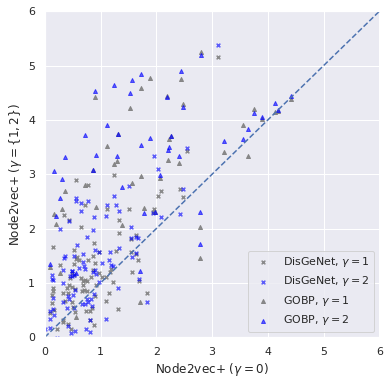

HumanBaseTop-global


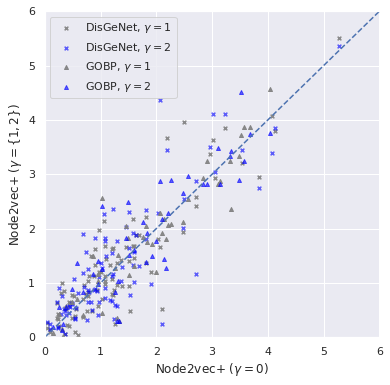

STRING


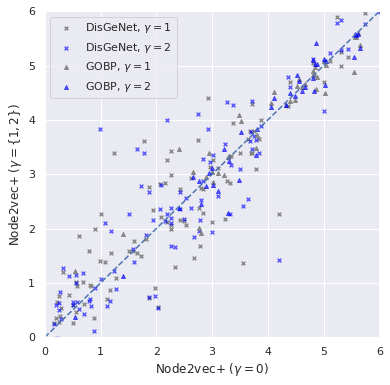

In [3]:
lim = (0, 6)
marker_dict = {
    "GOBP": ("^", 16),
    "DisGeNet": ("x", 14),
}

for network_name, network_group in result_df.groupby("Network"):
    plt.figure(figsize=(6, 6))
    datasets = []
    for dataset_name, dataset_group in network_group.groupby("Dataset"):
        datasets.append(dataset_name)
        score_dict = {
            int(i): j.sort_values('Task')['Testing score'].values
            for i, j in dataset_group.groupby('gamma')
        }
        marker, size = marker_dict[dataset_name]
        plt.scatter(score_dict[0], score_dict[1], color="grey", s=size, alpha=0.9, marker=marker)
        plt.scatter(score_dict[0], score_dict[2], color="blue", s=size, alpha=0.6, marker=marker)

    plt.xlim(lim)
    plt.ylim(lim)
    plt.xlabel("Node2vec+ ($\gamma = 0$)")
    plt.ylabel("Node2vec+ ($\gamma = \{1, 2\}$)")
    plt.legend(
        [
            f"{datasets[0]}, $\gamma=1$",
            f"{datasets[0]}, $\gamma=2$",
            f"{datasets[1]}, $\gamma=1$",
            f"{datasets[1]}, $\gamma=2$",
        ]
    )
    plt.plot(lim, lim, '--')
    print(network_name)
#     plt.savefig(f"fig_bio_nc_n2vplus_gamma_{network_name}.png", dpi=300, bbox_inches='tight') # uncomment to save
    plt.show()